In [13]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt

In [7]:
dataset = pandas.read_csv('international-airline-passengers.csv',
                          usecols=[1], engine='python', skipfooter=3)

In [8]:
dataset

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


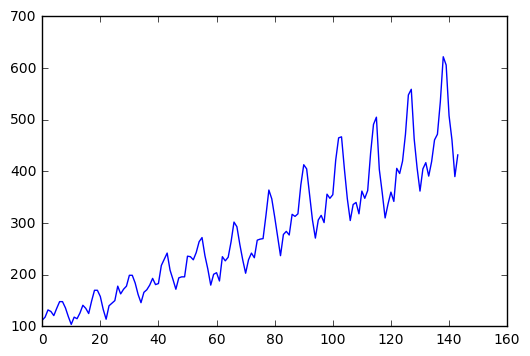

In [14]:
plt.plot(dataset)

## LSTM

There are three types of gates within a unit:

- Forget Gate: conditionally decides what information to throw away from the block.
- Input Gate: conditionally decides which values from the input to update the memory state.
- Output Gate: conditionally decides what to output based on input and the memory of the block.

Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training procedure.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [17]:
np.random.seed(7)

In [24]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
type(dataframe), type(dataset)
dataset = dataset.astype('float32')

In [26]:
dataset.shape

(144, 1)

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

In [28]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [30]:
dataset.shape

(144, 1)

In [32]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
print(train_size, test_size)

96 48
